In [1]:
#### import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
folder ="../../measurements/free_running_spectra/03_04_2020/"
folder_OLG ="../../measurements/OLG/1_16_2020/"
folder_HVA = "../../measurements/HVASVR_tf/HVACH3_plus_pomona/02_19_2020/"

In [4]:
#input_osc = np.loadtxt(folder + '10kHz_sinusoid_3310AHPsiggen.TXT')
n1_tot = np.loadtxt(folder + 'noisefloor_VrmsprtHz.TXT')
n2_tot = np.loadtxt(folder + 'noisefloor_Vpk.TXT')

In [5]:
n3_tot= np.loadtxt(folder + '200Vdrive_VrmsprtHz.TXT')
n4_tot = np.loadtxt(folder + '200Vdrive_Vpk.TXT')

In [6]:
n5_tot = np.loadtxt(folder + '300Vdrive_VrmsprtHz.TXT')
n6_tot = np.loadtxt(folder + '300Vdrive_Vpk.TXT')

In [7]:
dbHVA_tot = np.loadtxt(folder_HVA + 'dB.TXT')
phHVA_tot = np.loadtxt(folder_HVA + 'DEG.TXT')

In [8]:
ff = dbHVA_tot[:,0]
aa = 10**(dbHVA_tot[:,1]/20)* np.exp(1j*(phHVA_tot[:,1]/180)*np.pi)

In [9]:
olgdb = np.loadtxt(folder_OLG + 'OLG_AMP.TXT')
olgdeg = np.loadtxt(folder_OLG + 'OLG_PH.TXT')

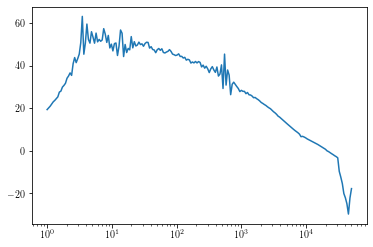

In [10]:
plt.semilogx(olgdb[:,0], olgdb[:,1])

In [11]:
f = olgdb[:,0]
bb = 10**(olgdb[:,1]/20)* np.exp(1j*(olgdeg[:,1]/180)*np.pi)

In [12]:
laserV2Hz = 1e6
a = np.interp(f, ff,aa)
aHzpV = laserV2Hz*a

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


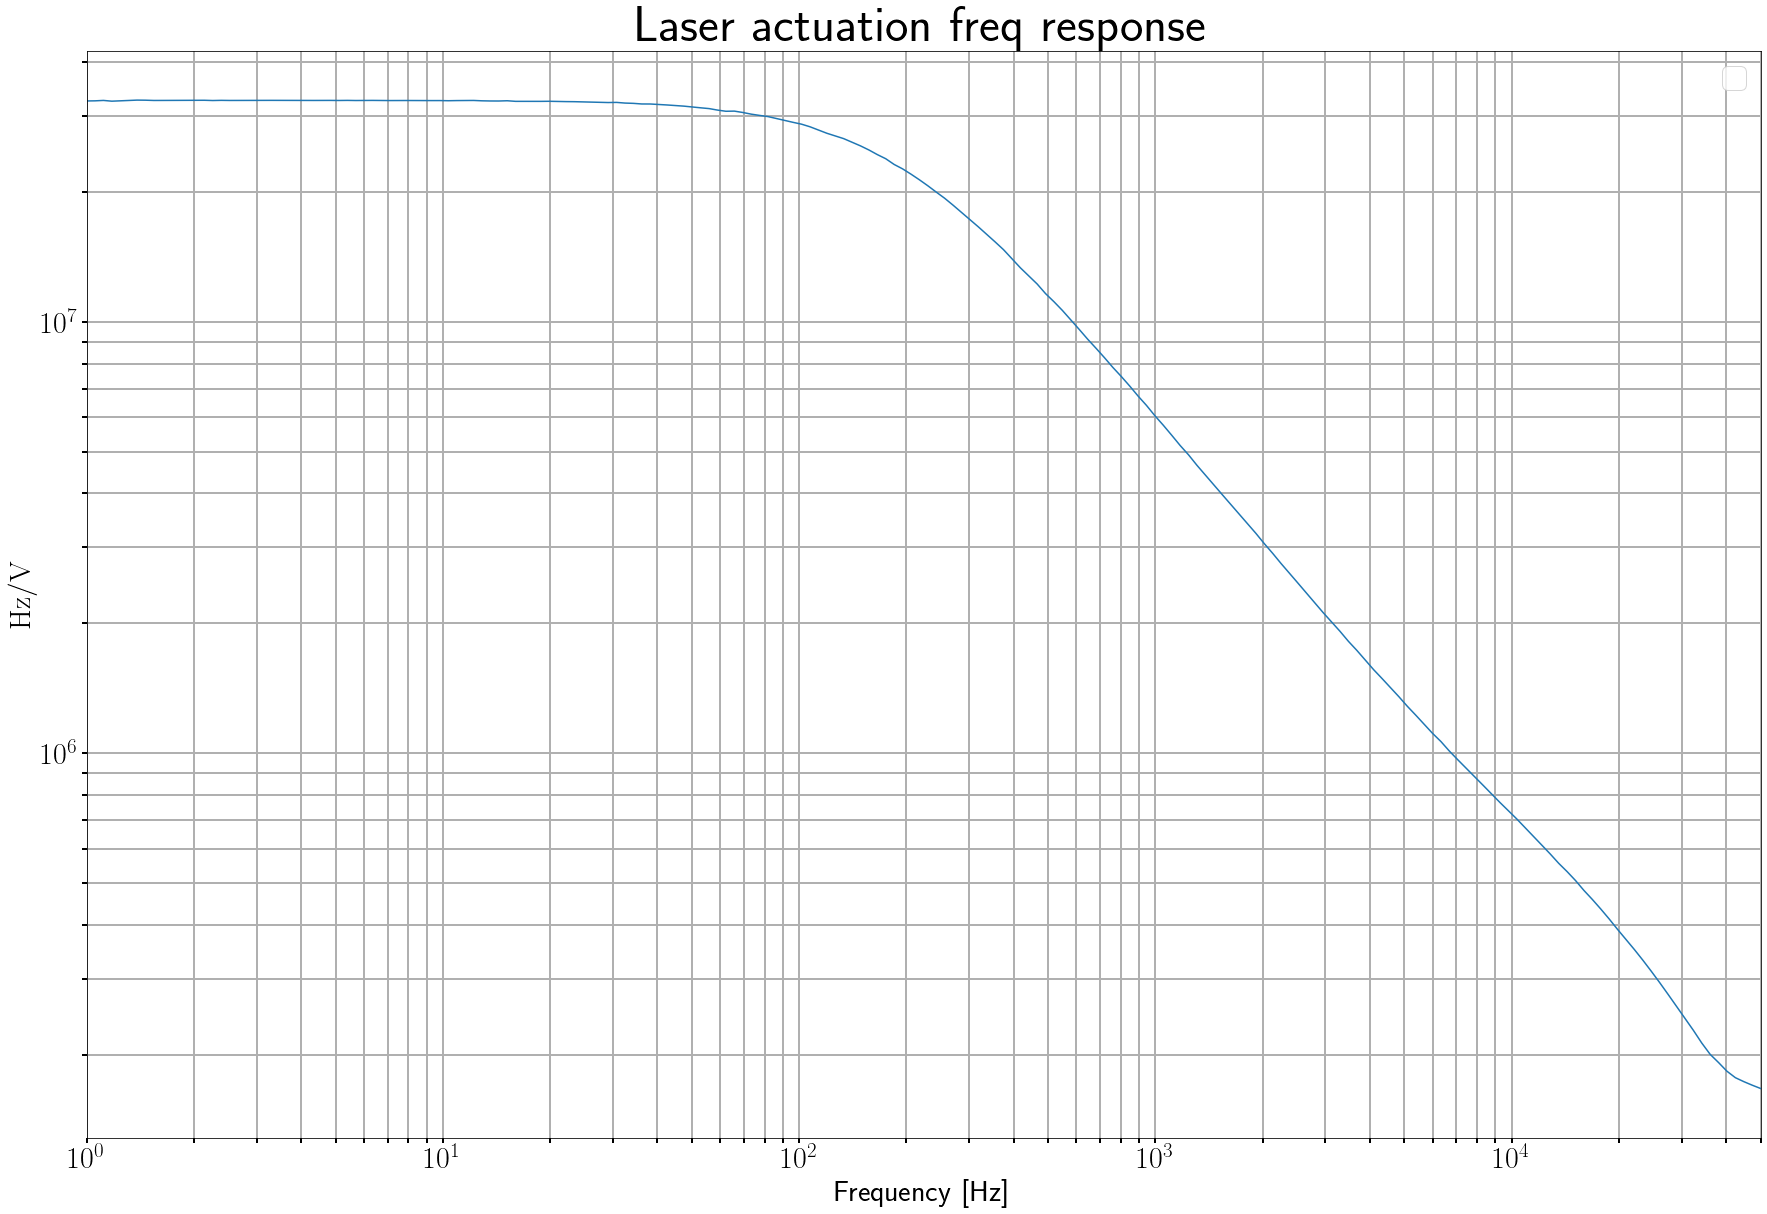

In [13]:
fig = plt.figure(figsize=(30,20))
plt.loglog(f,abs(aHzpV))
plt.xlim([f[0], f[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$\mathrm{Hz}/\mathrm{V}$$',FontSize=30)
plt.title("Laser actuation freq response", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

*  What I wish to compute is a Hz/V calibration function based on the measurements I have made (since I can't assume that the laser's actuation will be as perfect as the above figure reports)
* To understand how to compute the displacement noise, you must understand where the measured voltage noise arises from.
* This measured voltage noise is assumed to be a byproduct of the noise coupling into the cavity's sensing of displacement.
* This means that if the cavity were not in a loop what we would measure would be the noise times the sensing function
* Thereafter we the noise adds on as a infinite number of terms which are a multiple of this noise times the sensing function as well as varying degrees of the open loop gain (OLG). 
* The infinite series represents the closed loop gain characteristics of the loop and to retrieve the value of the measurment, we multiply it by the sensing function times the noise
* BUT we don't have a good measurment of the sensing function :/ but ALAS! we have an expression of the sensing function in terms of the open loop gain divided by the actuation function
* This then allows us to have an expression of the Hz/V calibration by flipping the prefactor to the coupled noise which should give us a laser frequency noise if multiplied by our voltage measurement

In [14]:
OLG = bb
CLG = 1/(1-OLG)
CAL_=OLG*CLG
CALVpHz=CAL_/aHzpV
CALHzpV = aHzpV/CAL_

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


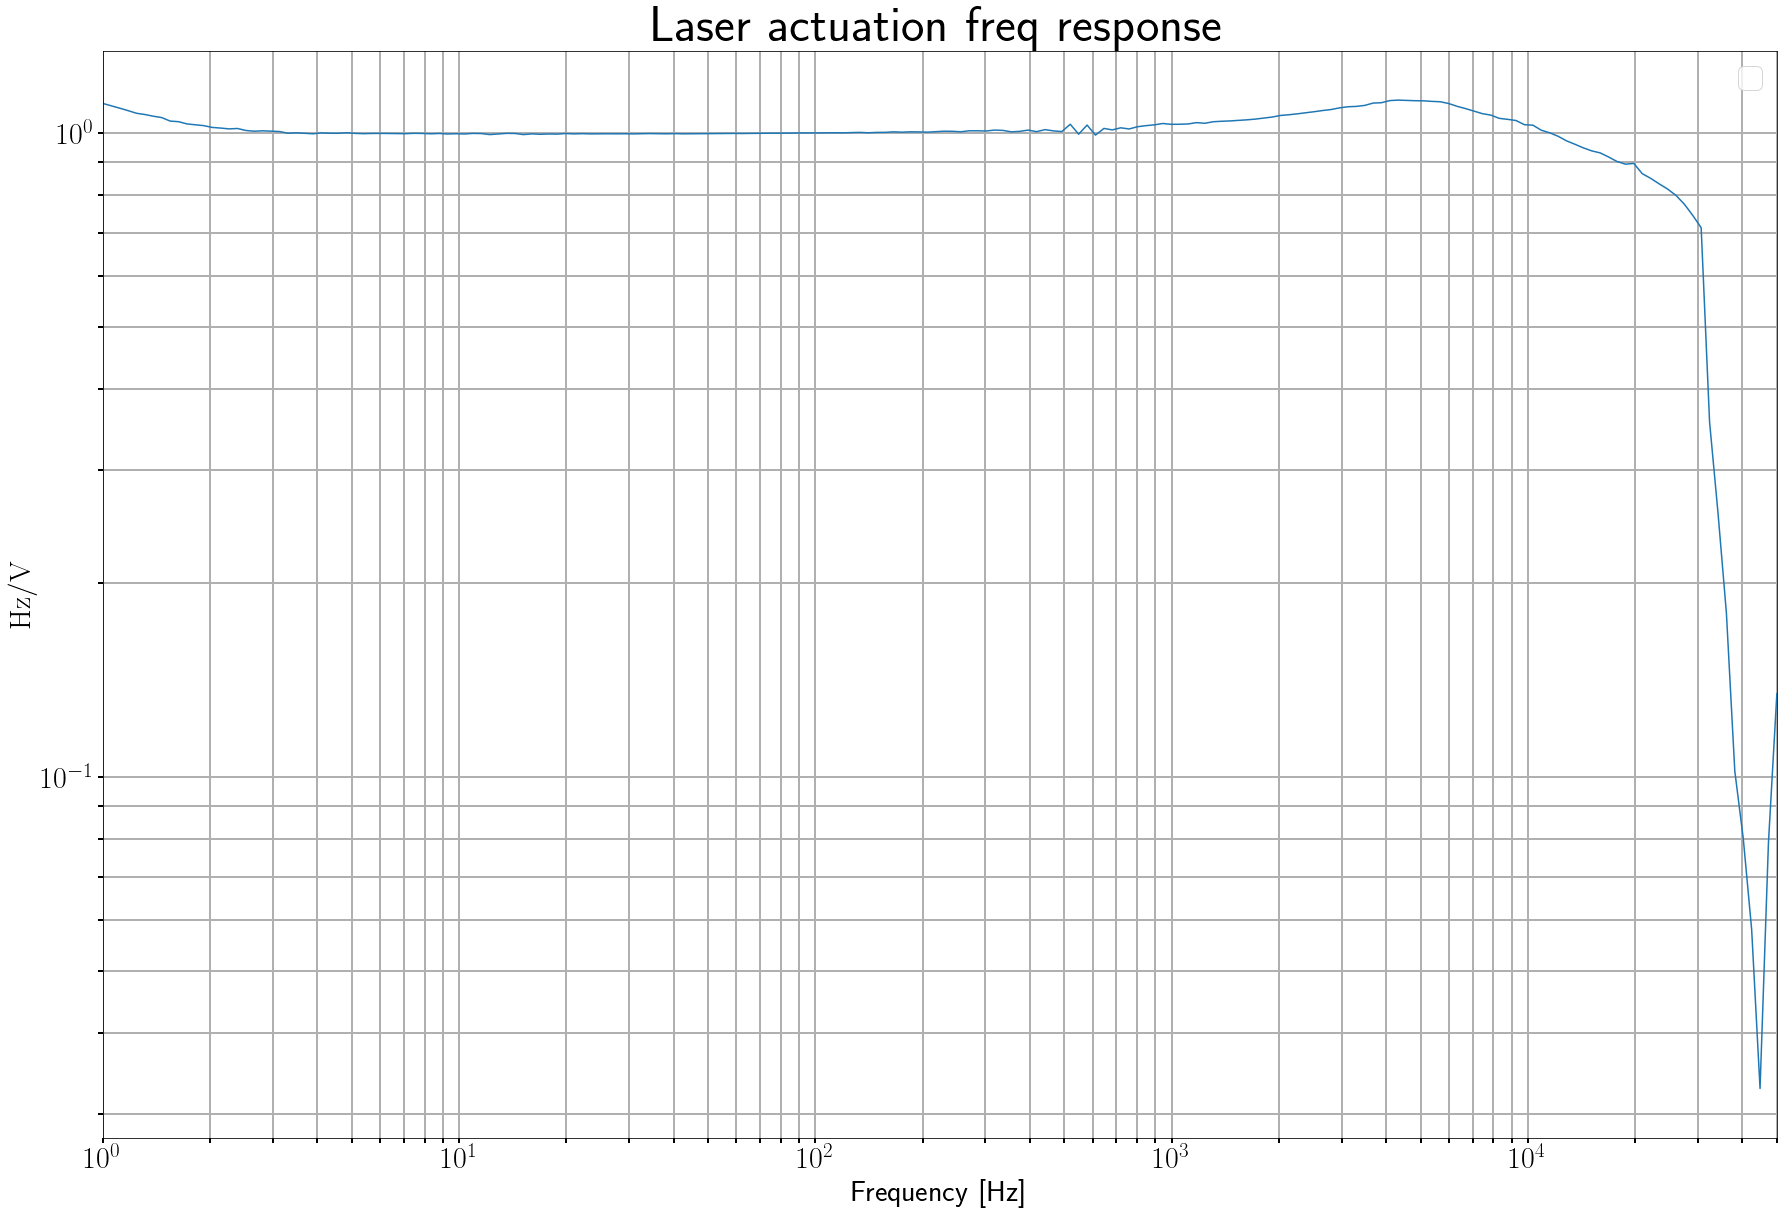

In [15]:
fig = plt.figure(figsize=(30,20))
plt.loglog(f,abs(CAL_))
plt.xlim([f[0], f[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$\mathrm{Hz}/\mathrm{V}$$',FontSize=30)
plt.title("Laser actuation freq response", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

In [16]:
fff = n1_tot[:,0]
n1 = n1_tot[:,1]
n2 = n2_tot[:,1]
n3 = n3_tot[:,1] 
n4 = n4_tot[:,1]
n5 = n5_tot[:,1]
n6 = n6_tot[:,1]

In [17]:
cal = np.interp(fff,f, CALHzpV)
nHz1 = abs(n1*cal)
nHz2 = abs(n2*cal)
nHz3 = abs(n3*cal)
nHz4 = abs(n4*cal)
nHz5 = abs(n5*cal)
nHz6 = abs(n6*cal)

In [18]:
c = 299792458
lamb =1.064e-6
nu = c/lamb
Lcav = 0.165

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


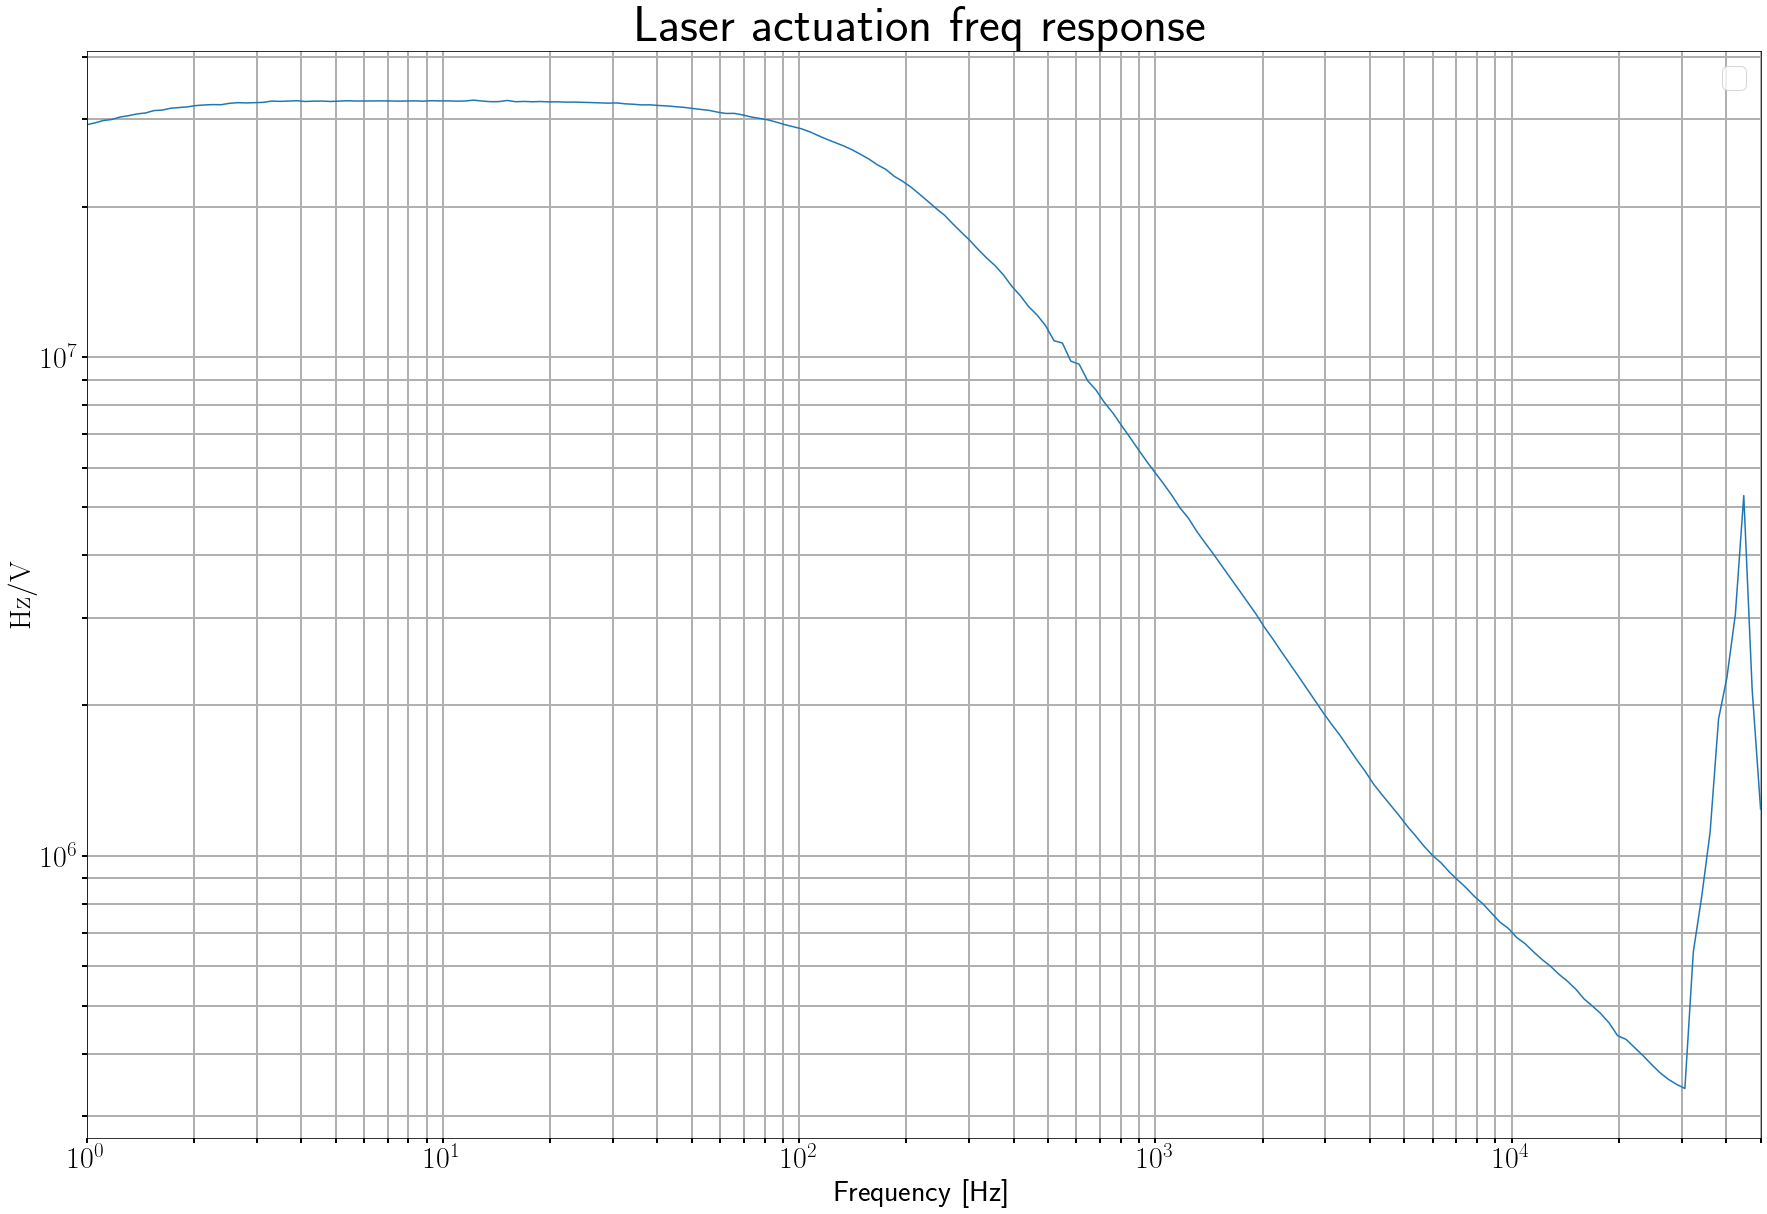

In [19]:
fig = plt.figure(figsize=(30,20))
plt.loglog(f,abs(CALHzpV))
plt.xlim([f[0], f[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$\mathrm{Hz}/\mathrm{V}$$',FontSize=30)
plt.title("Laser actuation freq response", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


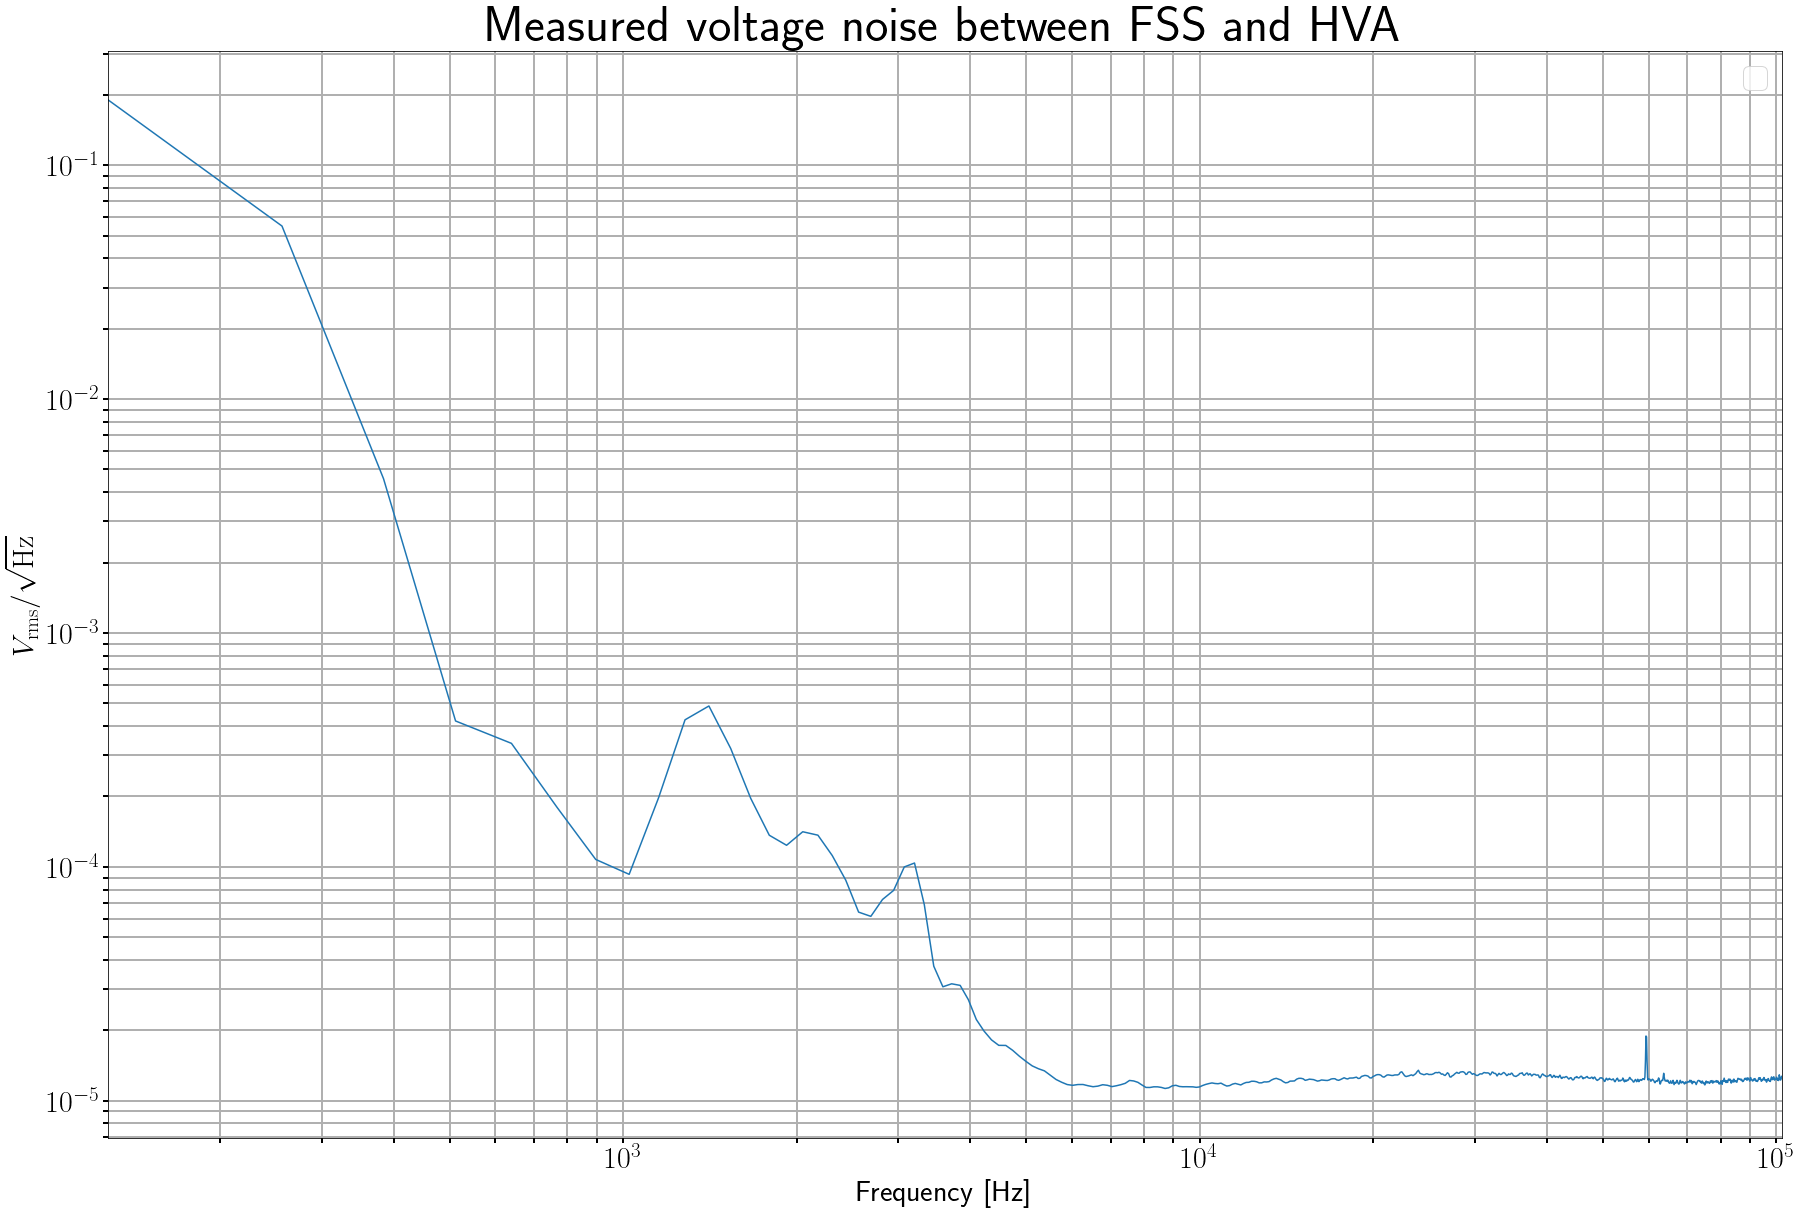

In [20]:
fig = plt.figure(figsize=(30,20))
plt.loglog(fff,n1)
plt.xlim([fff[0], fff[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$V_{\mathrm{rms}}/\sqrt{\mathrm{Hz}}$$',FontSize=30)
plt.title("Measured voltage noise between FSS and HVA", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


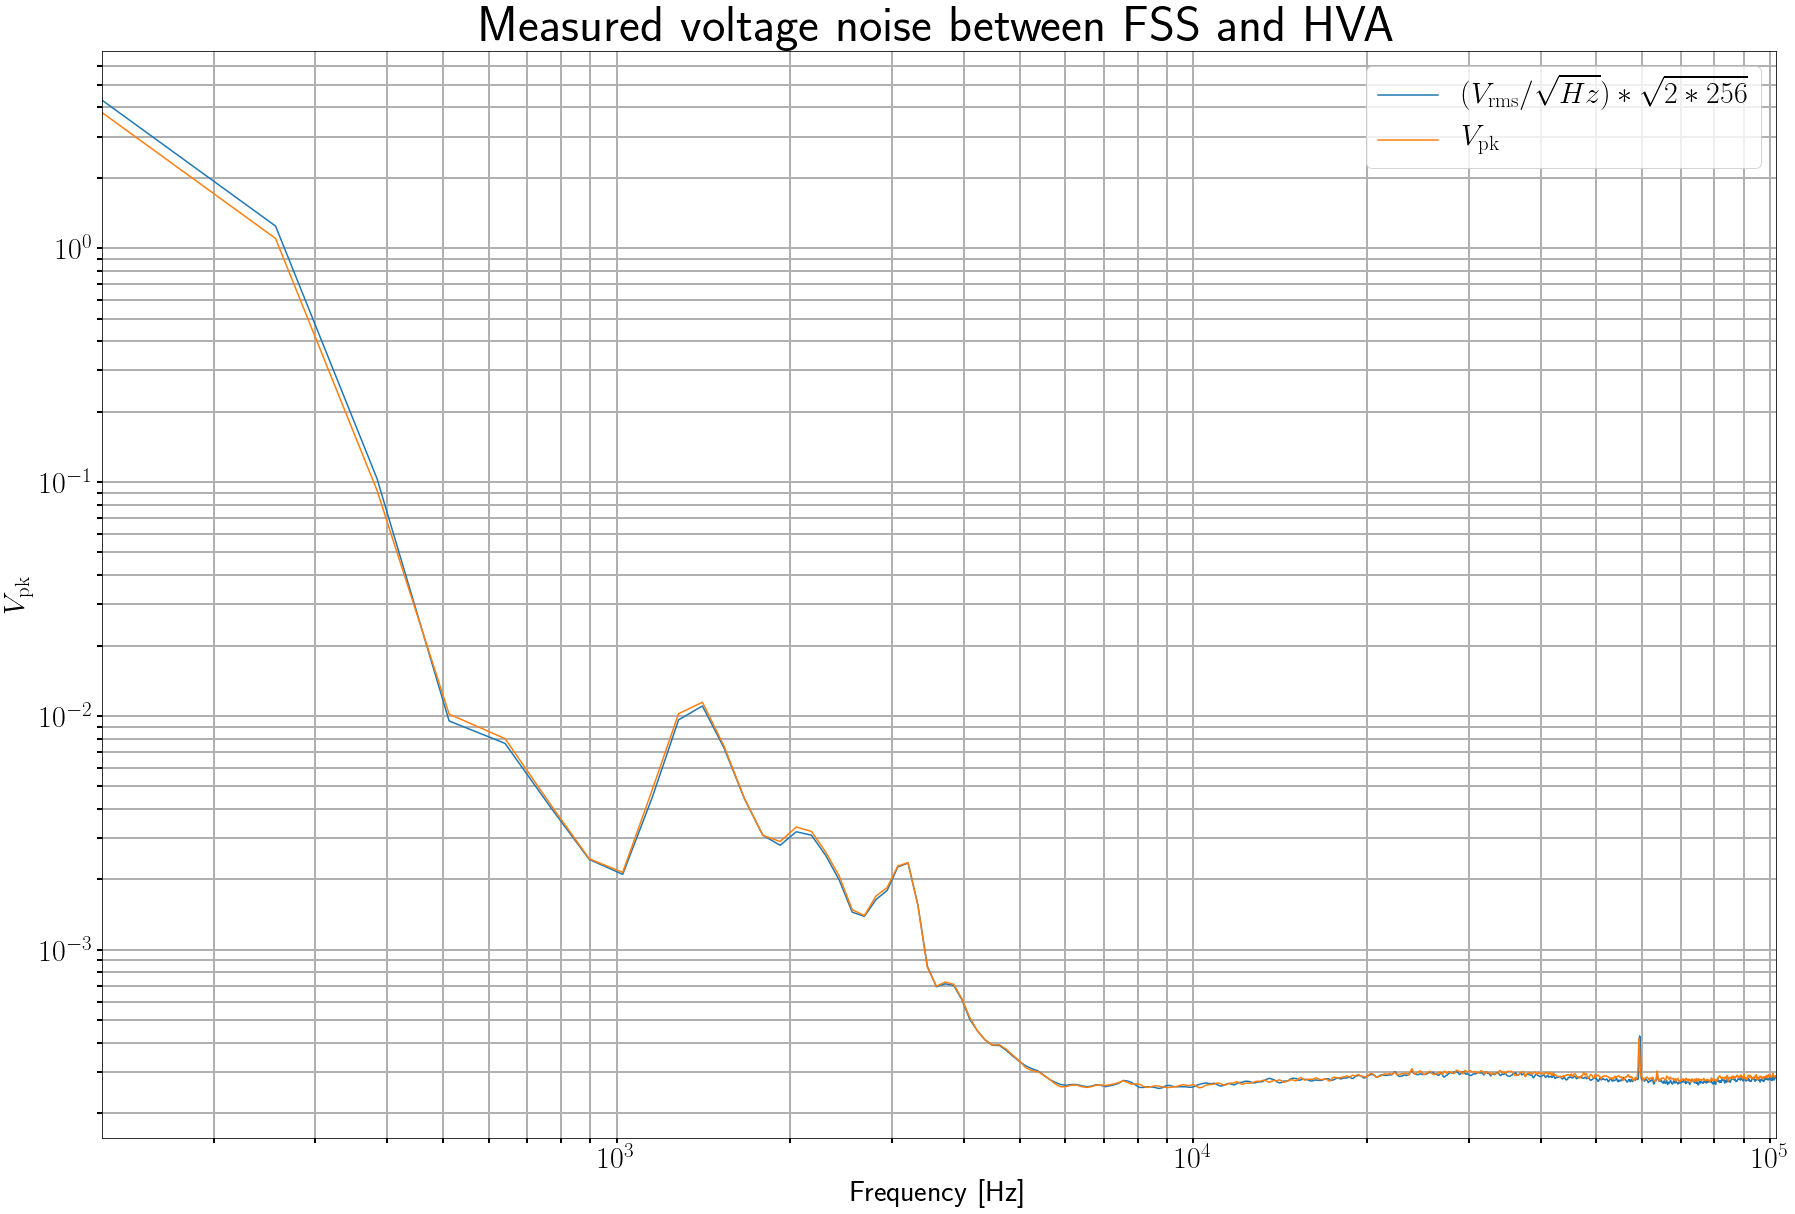

In [21]:
fig = plt.figure(figsize=(30,20))
plt.loglog(fff,n1*np.sqrt(2*256),label='$(V_\mathrm{rms}/\sqrt{Hz})*\sqrt{2*256}$')
plt.loglog(fff,n2, label = '$V_\mathrm{pk}$')
plt.xlim([fff[0], fff[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$V_{\mathrm{pk}}$$',FontSize=30)
plt.title("Measured voltage noise between FSS and HVA", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


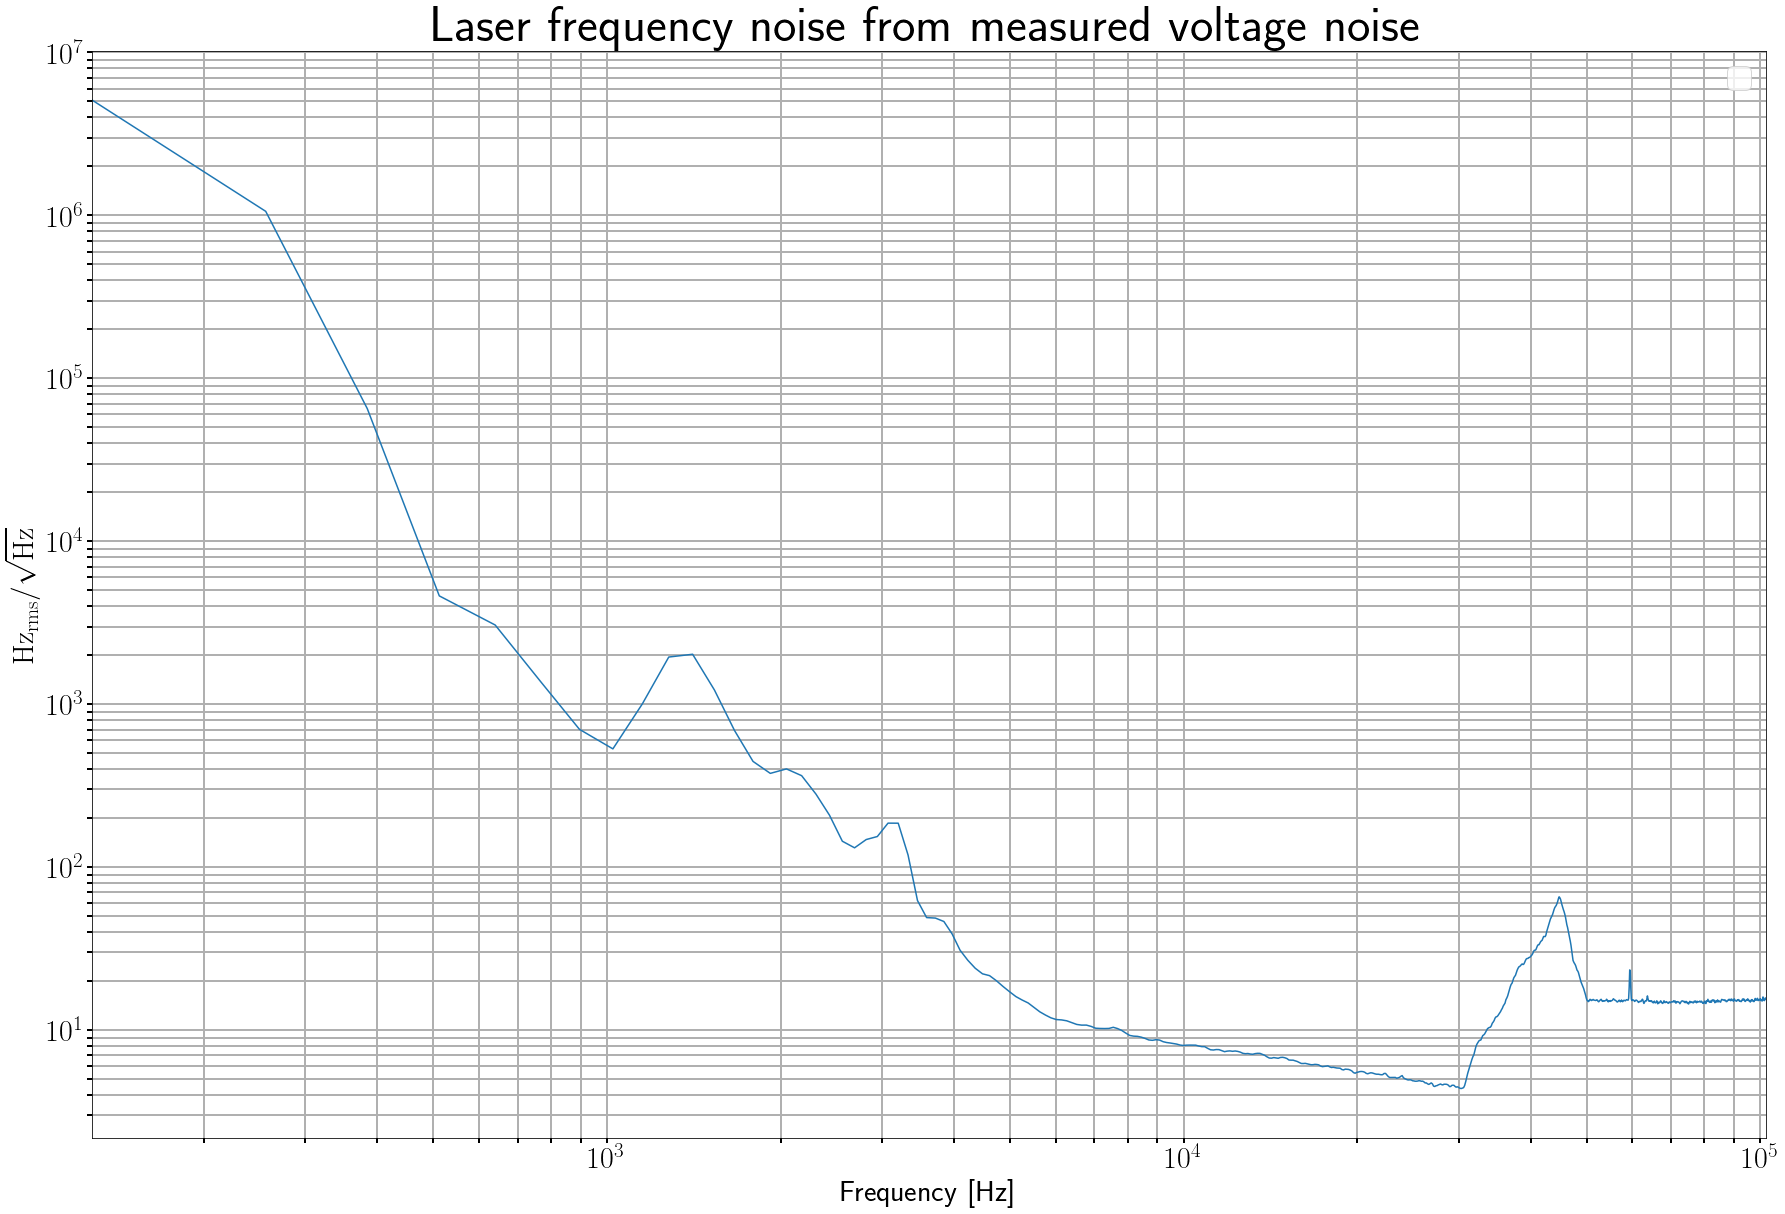

In [22]:
fig = plt.figure(figsize=(30,20))
plt.loglog(fff,nHz1)
plt.xlim([fff[0], fff[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$\mathrm{Hz}_\mathrm{rms}/\sqrt{\mathrm{Hz}}$$',FontSize=30)
plt.title("Laser frequency noise from measured voltage noise", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


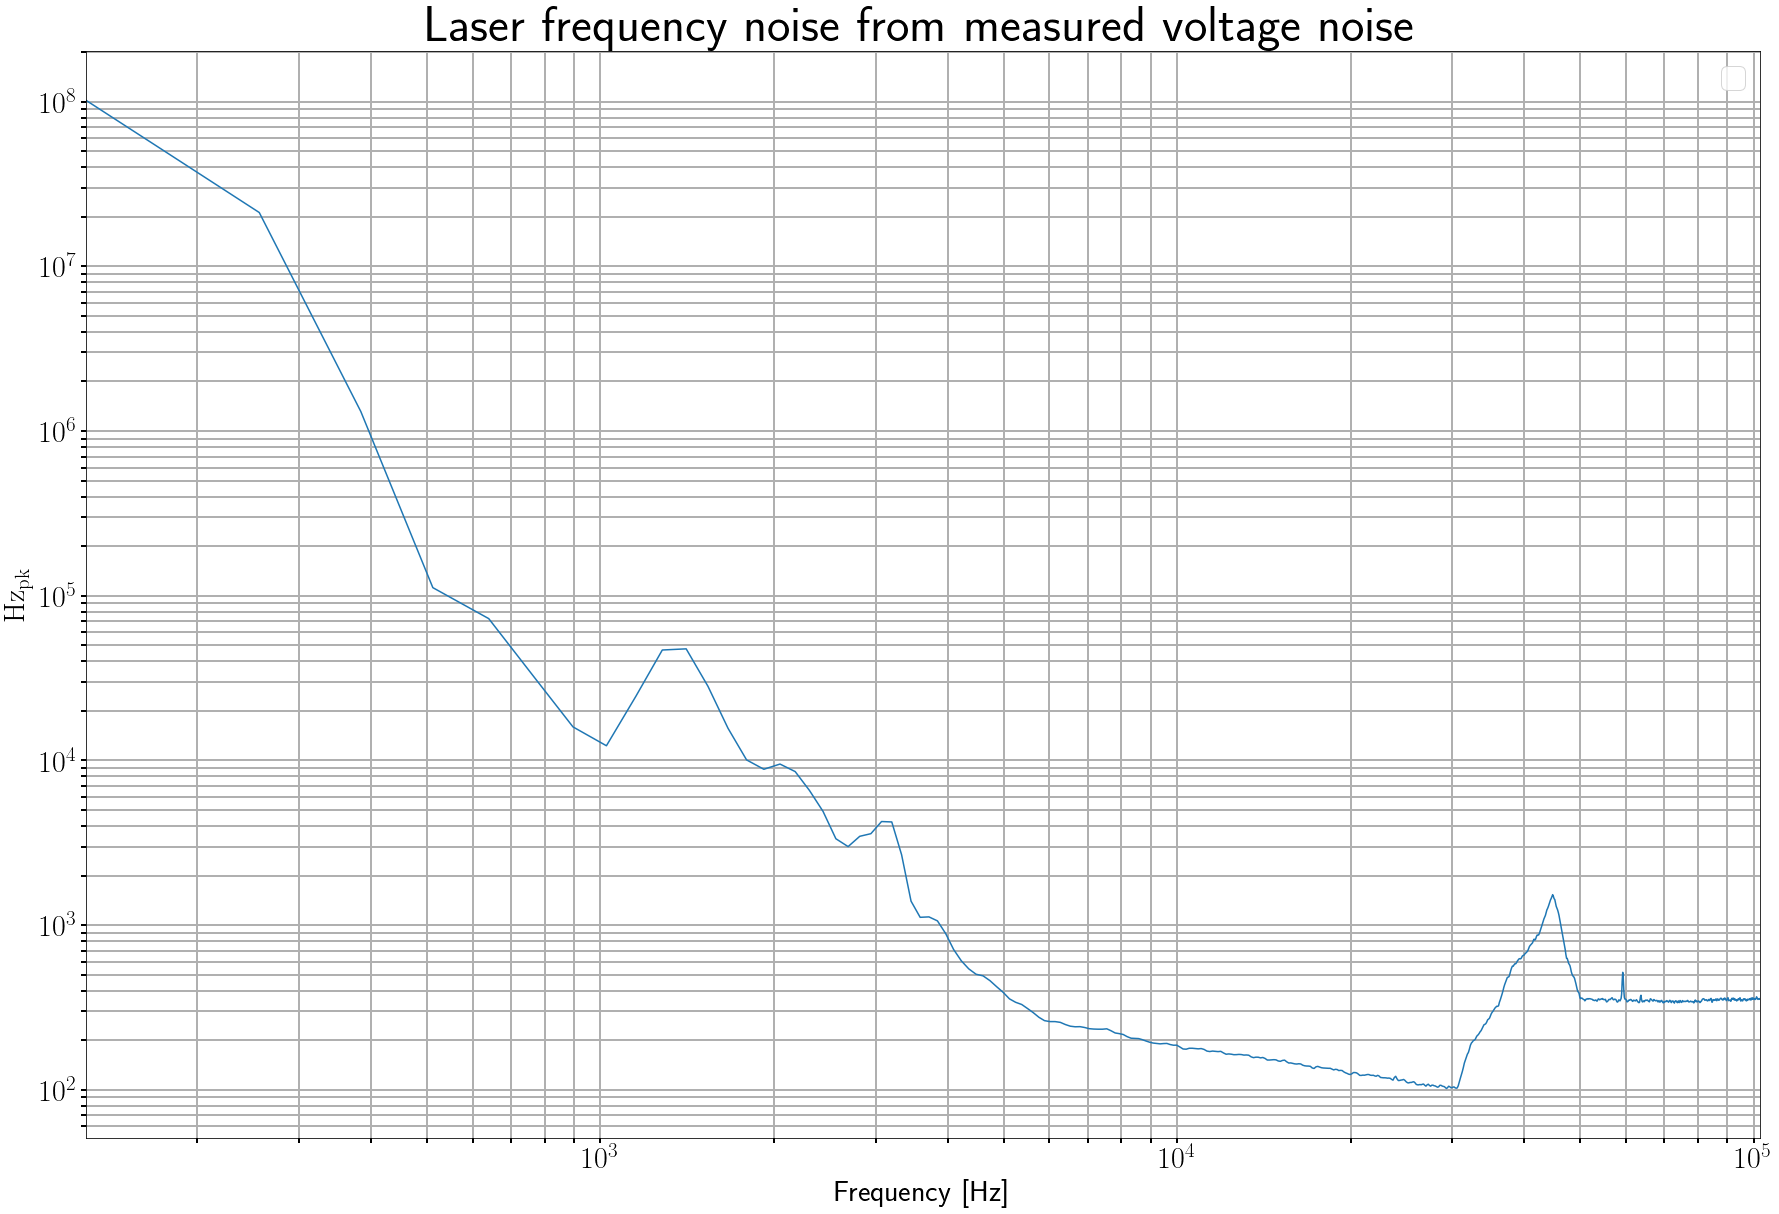

In [23]:
fig = plt.figure(figsize=(30,20))
plt.loglog(fff,nHz2)
plt.xlim([fff[0], fff[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$\mathrm{Hz}_\mathrm{pk}$',FontSize=30)
plt.title("Laser frequency noise from measured voltage noise", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


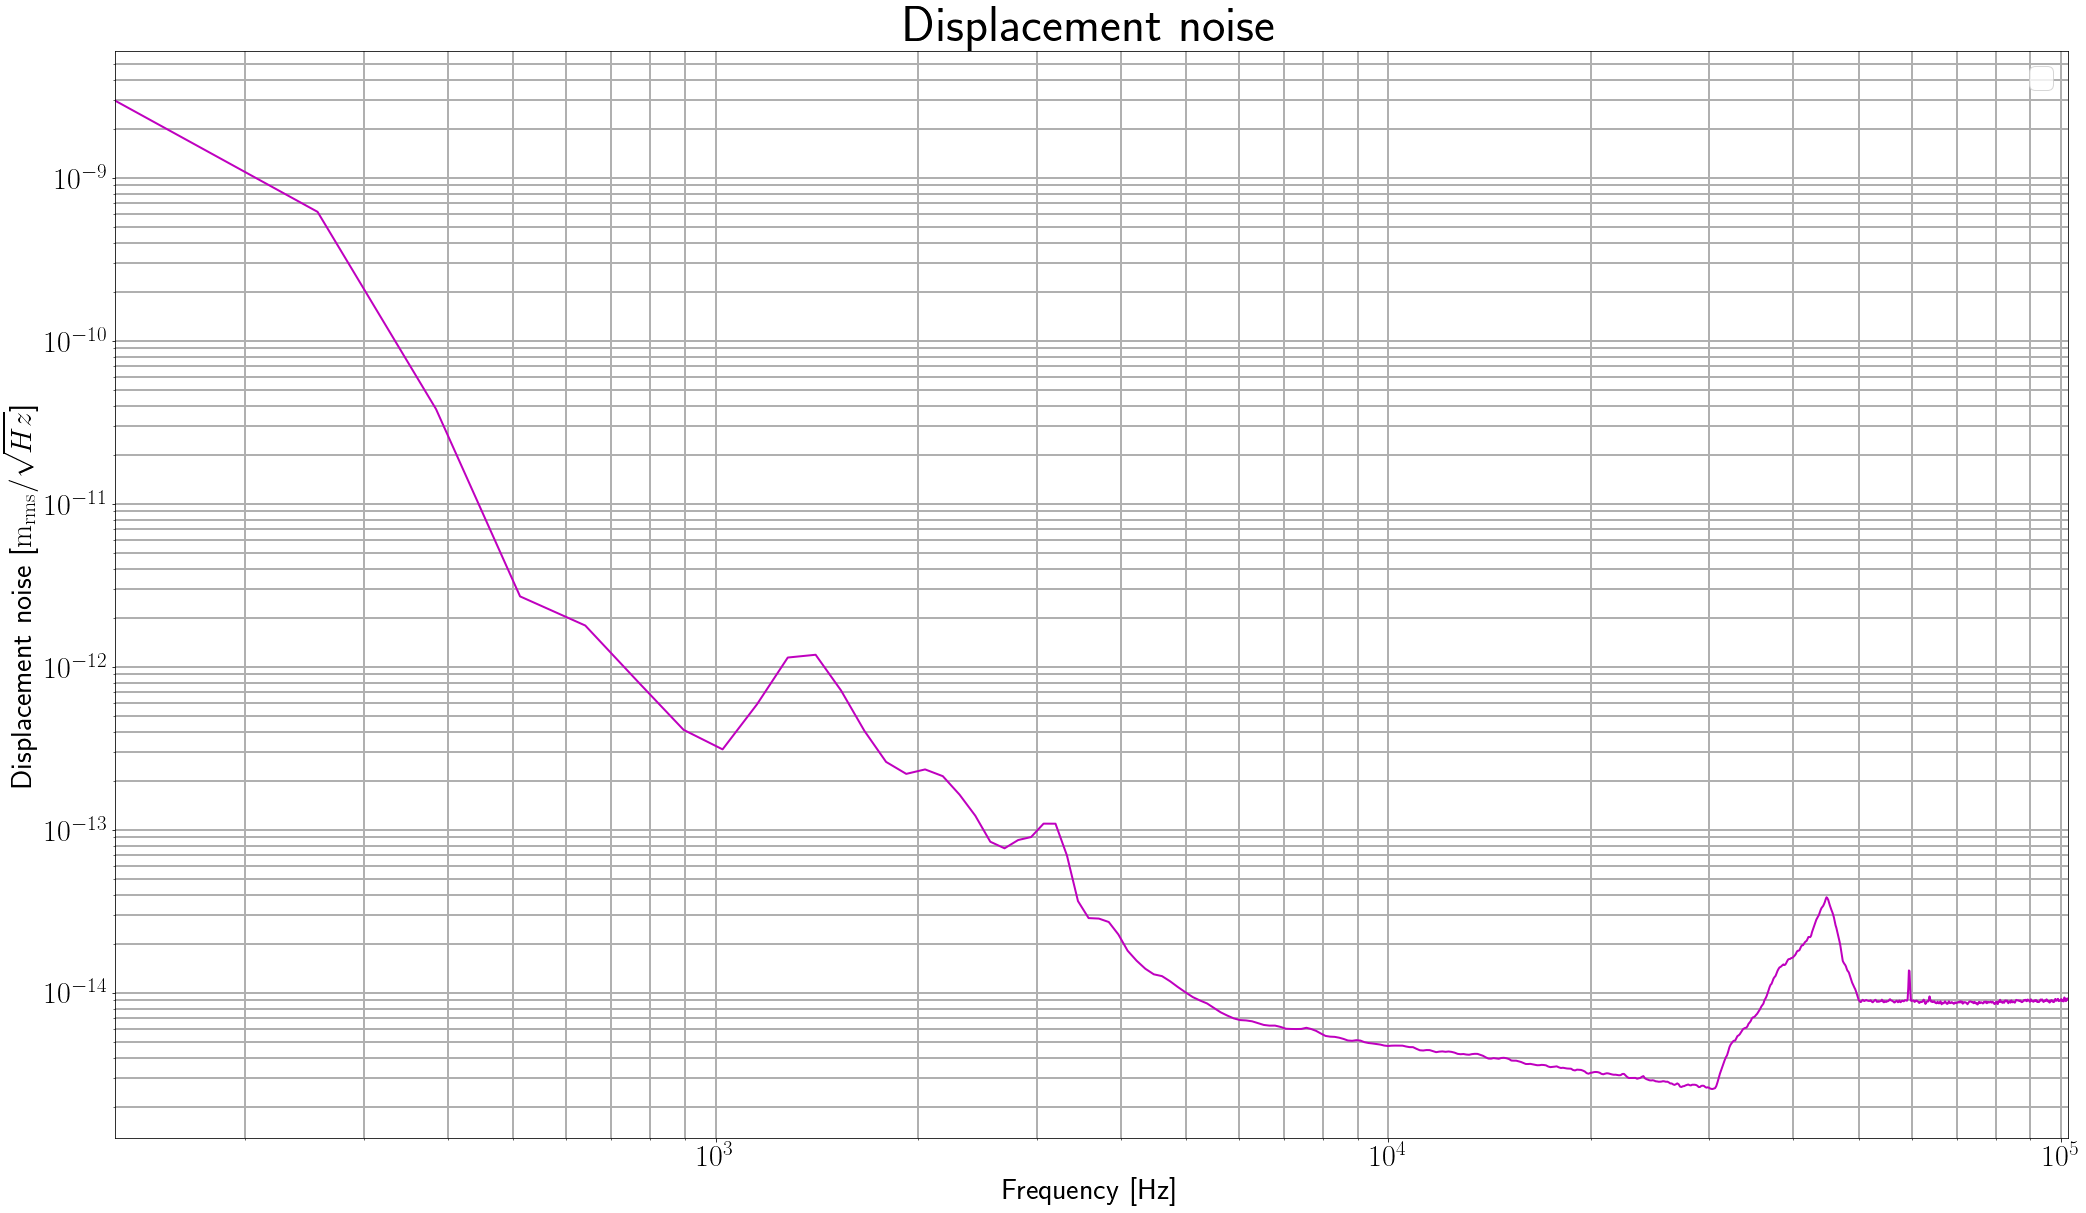

In [24]:
fig = plt.figure(figsize=(35,20))
#plt.loglog(fff,nHz2*Lcav/nu, label='Noise driven $\mathrm{Vpk} = 189\;\mathrm{V}$')
plt.loglog(fff,nHz1*Lcav/nu,color='m',linewidth=2)
plt.xlim([fff[0], fff[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('Displacement noise [$\mathrm{m}_\mathrm{rms}/\sqrt{Hz}$]',FontSize=30)
plt.title("Displacement noise", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
plt.savefig(folder + 'displacement_noise_floor.png',dpi=300,bbox_inches='tight')

In [25]:
disp_noise = nHz1*Lcav/nu

In [26]:
disp_noise[78]

4.7392617881205966e-15

# Simple capacitor computation

* For a simple parallel plate capacitor with a plate separation of 9 mm, we estimate that 300 V will give an upper limit of:

$$ \frac{300}{.009} \approx 3333 \; [V/m] $$

/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


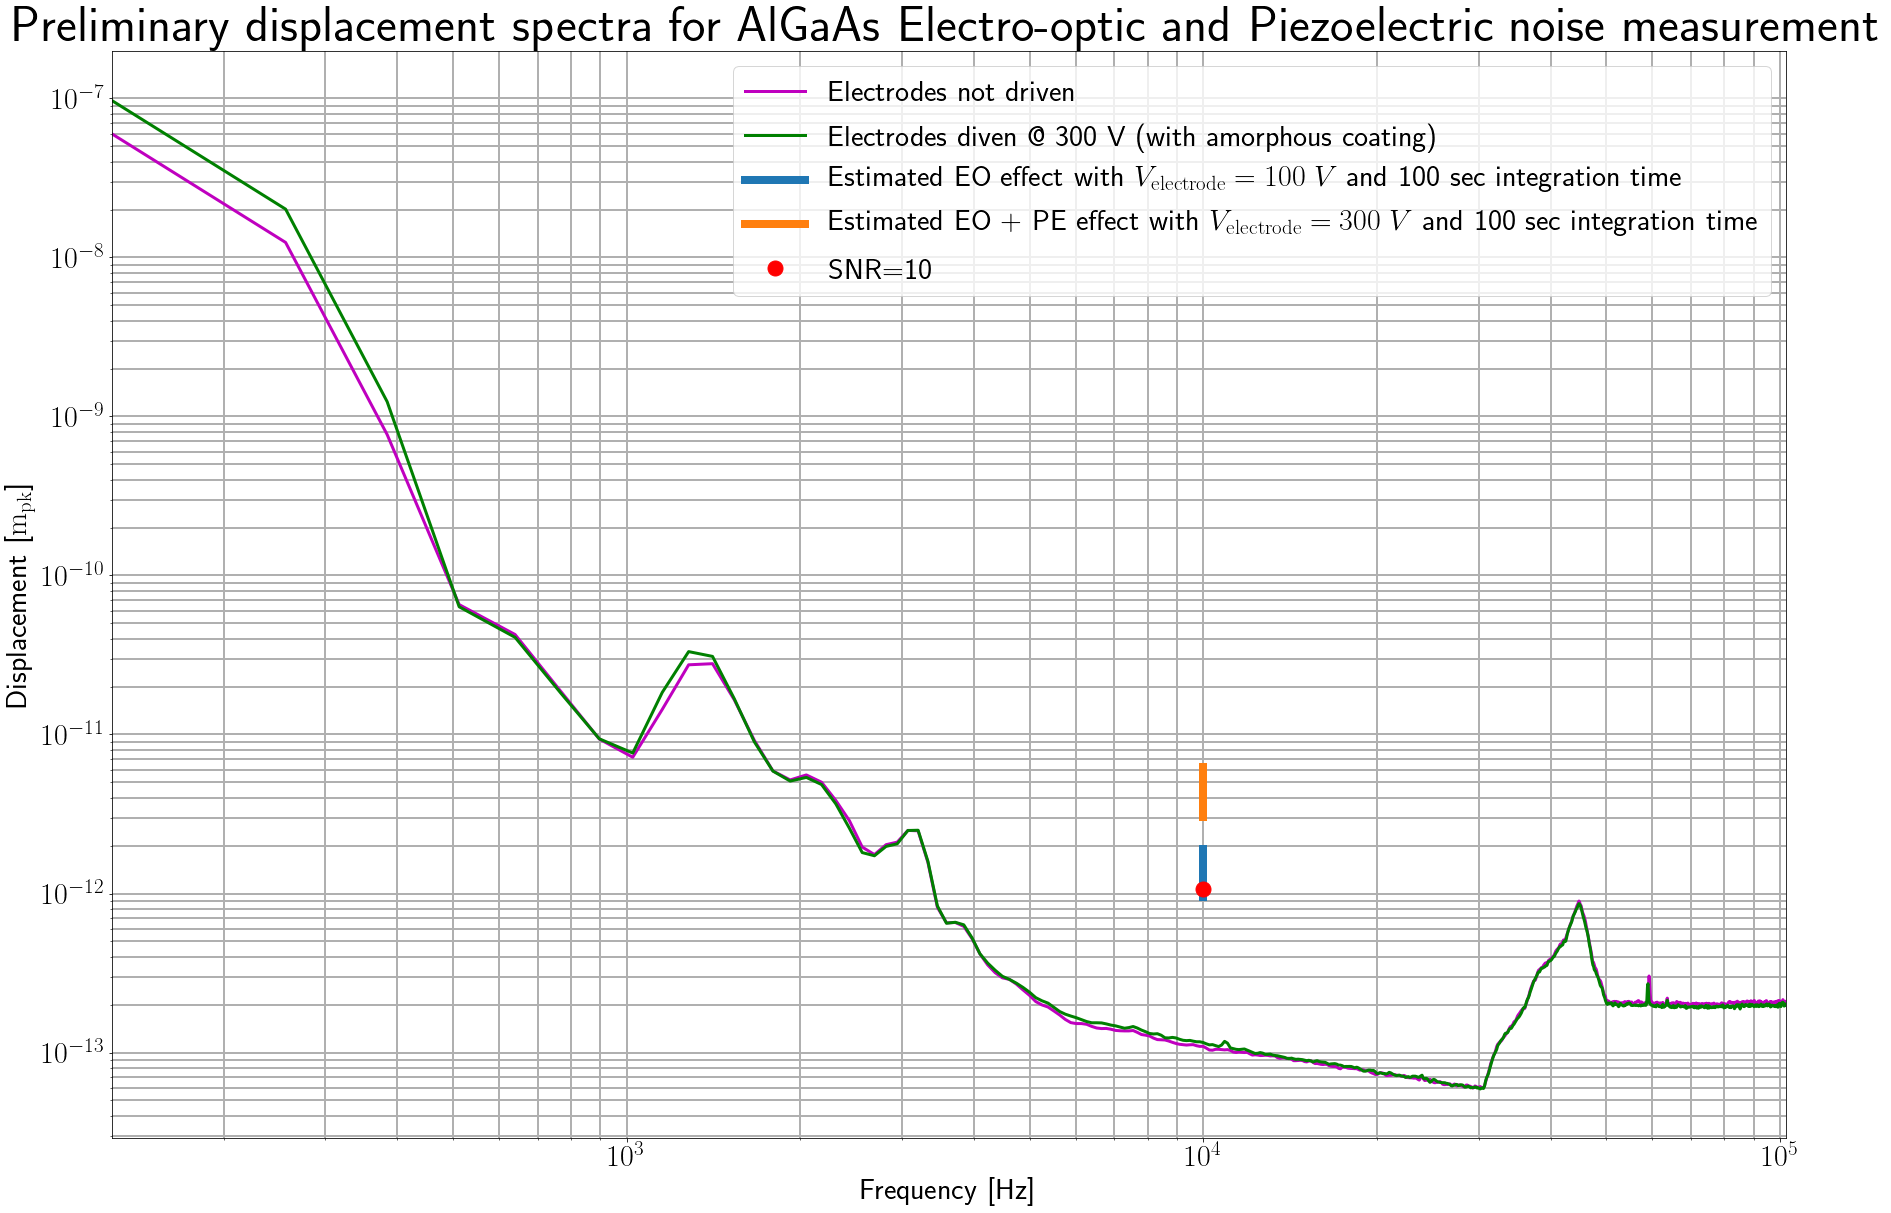

In [27]:
fig = plt.figure(figsize=(30,20))
plt.loglog(fff,nHz2*Lcav/nu,color = 'm', label='Electrodes not driven',linewidth=3)
plt.loglog(fff,nHz6*Lcav/nu,color='g',label='Electrodes diven @ 300 V (with amorphous coating)', linewidth=3)
plt.loglog(np.array([10000,10000]),3.8e-16*np.array([2500.0,5000.0]), label = 'Estimated EO effect with $V_\mathrm{electrode}= 100 \;V$ and 100 sec integration time',linewidth=8)
plt.loglog(np.array([10000,10000]),3.8e-16*np.array([8000.0,16500.0]), label='Estimated EO + PE effect with $V_\mathrm{electrode}= 300\; V$ and 100 sec integration time',linewidth=8)
plt.loglog(10000,nHz2[78]*Lcav/nu*10,'o',color='r', label='SNR=10',markersize=15)
plt.xlim([fff[0], fff[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('Displacement [$\mathrm{m}_\mathrm{pk}$]',FontSize=30)
plt.title("Preliminary displacement spectra for AlGaAs Electro-optic and Piezoelectric noise measurement", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
plt.grid(b=None, which='minor', axis='both',linewidth=2)
plt.yscale('log')
ax = plt.axes()
plt.savefig(folder + 'displacement_electrodes_driven_300V.png',dpi=300,bbox_inches='tight')

/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


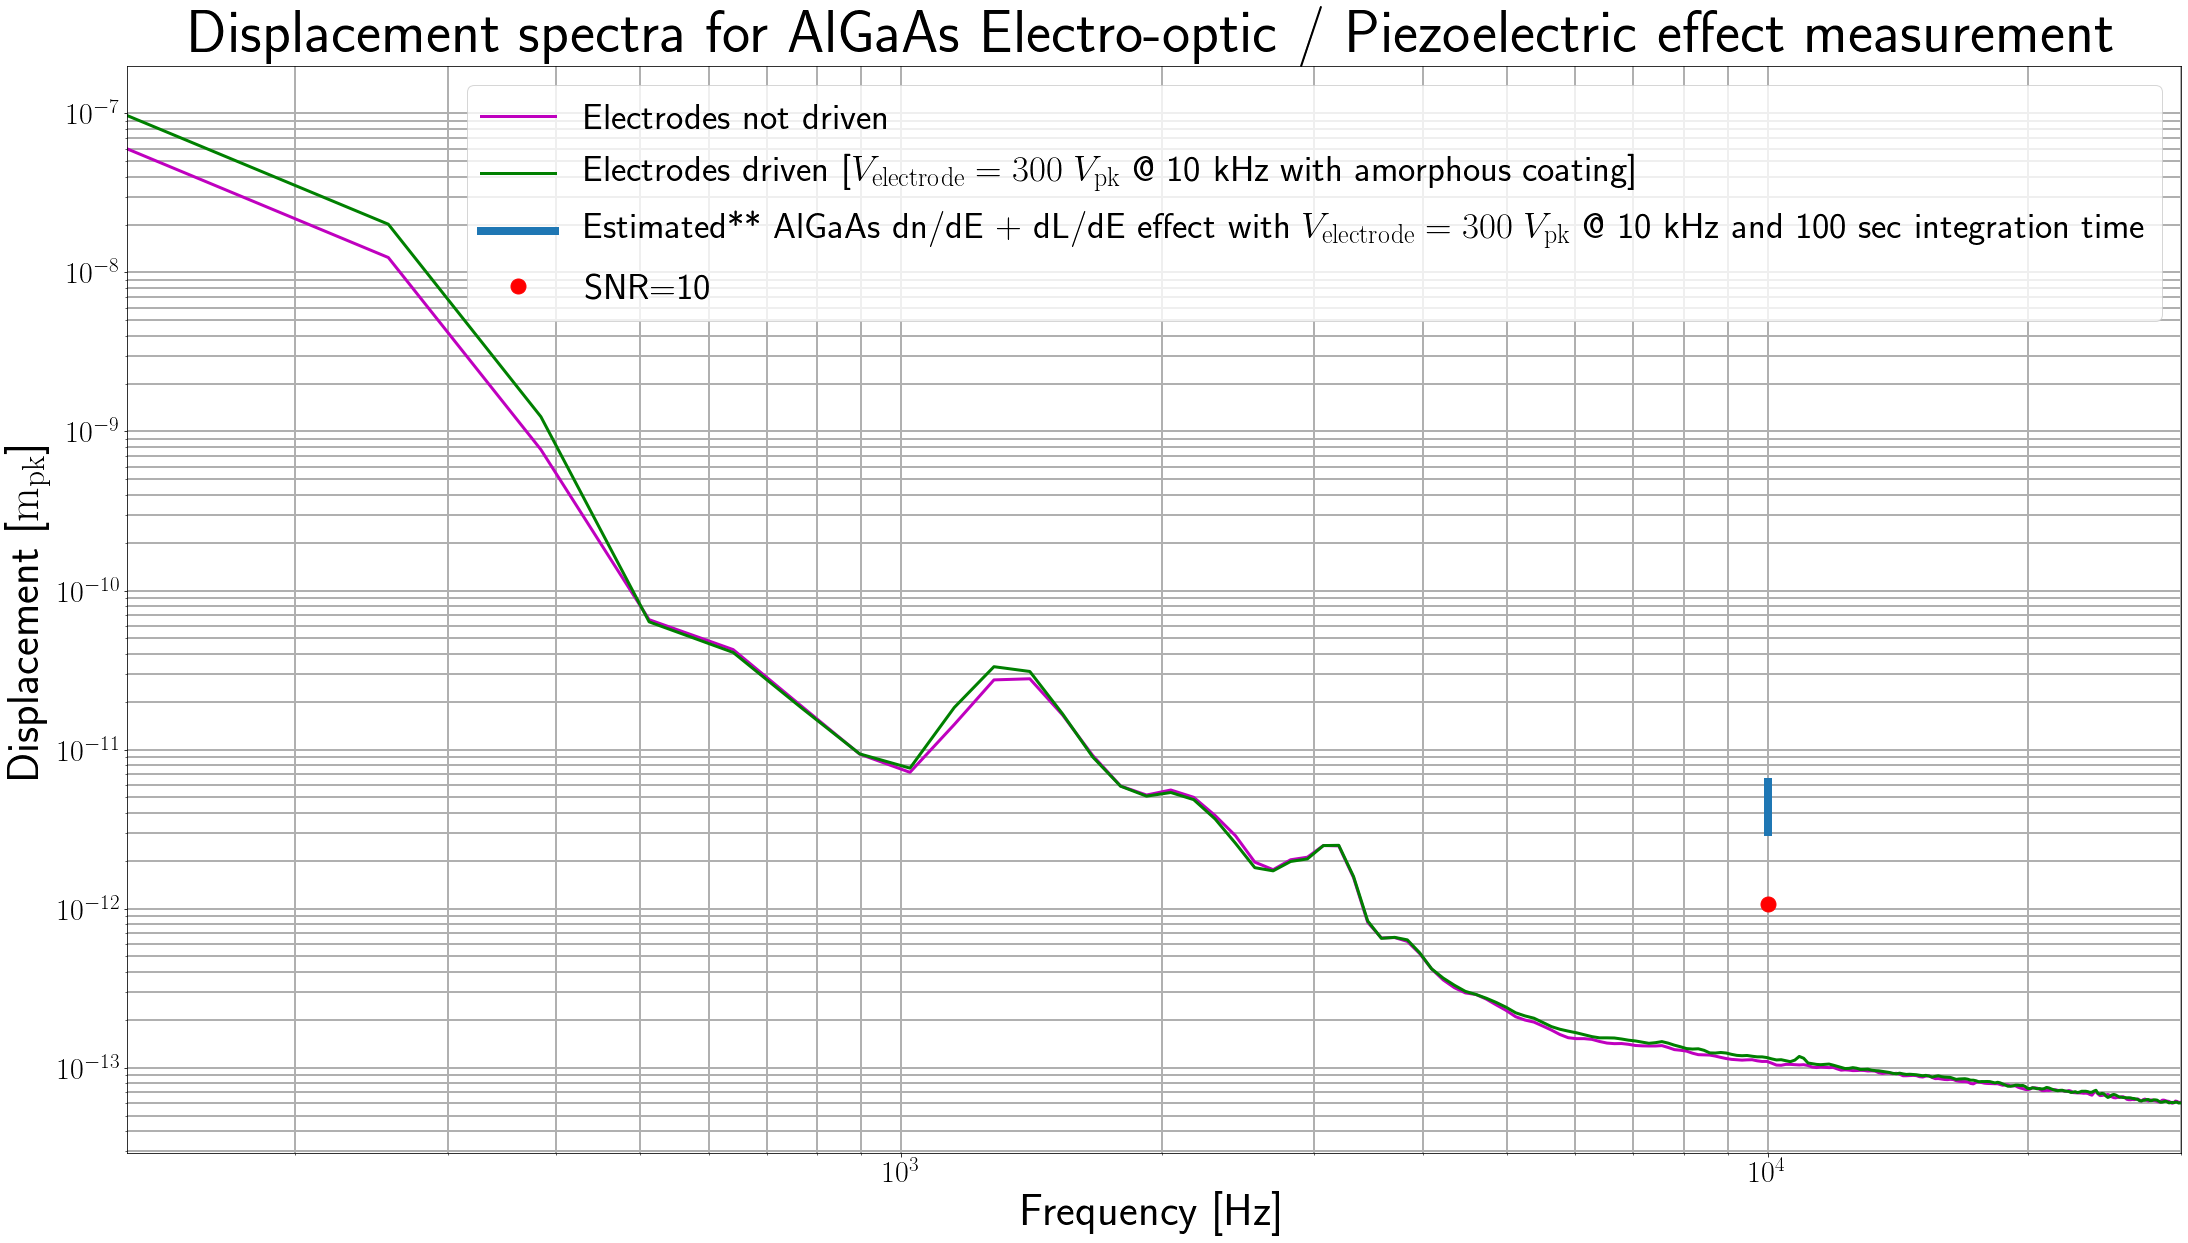

In [43]:
fig = plt.figure(figsize=(36.8,20))
plt.loglog(fff,nHz2*Lcav/nu,color = 'm', label='Electrodes not driven',linewidth=3)
plt.loglog(fff,nHz6*Lcav/nu,color='g',label='Electrodes driven [$V_\mathrm{electrode}= 300\; V_\mathrm{pk}$ @ 10 kHz with amorphous coating]', linewidth=3)
#plt.loglog(np.array([10000,10000]),3.8e-16*np.array([2500.0,5000.0]), label = 'Estimated EO effect with $V_\mathrm{electrode}= 100 \;V$ and 100 sec integration time',linewidth=8)
plt.loglog(np.array([10000,10000]),3.8e-16*np.array([8000.0,16500.0]), label='Estimated** AlGaAs dn/dE + dL/dE effect with $V_\mathrm{electrode}= 300\; V_\mathrm{pk}$ @ 10 kHz and 100 sec integration time',linewidth=8)
plt.loglog(10000,nHz2[78]*Lcav/nu*10,'o',color='r', label='SNR=10',markersize=15)
plt.xlim([fff[0], 3e4])
plt.legend(fontsize=37)
plt.xlabel('Frequency [Hz]',FontSize=45)
plt.ylabel('Displacement [$\mathrm{m}_\mathrm{pk}$]',FontSize=45)
plt.title("Displacement spectra for AlGaAs Electro-optic / Piezoelectric effect measurement", FontSize=60)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
plt.grid(b=None, which='minor', axis='both',linewidth=2)
plt.yscale('log')
ax = plt.axes()
plt.savefig(folder + 'displacement_spectra_LVK.png',dpi=300,bbox_inches='tight')

In [29]:
disp = nHz6*Lcav/nu

In [30]:
disp[78]

1.1352980101845115e-13

In [31]:
fff[78]

10112.0

/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


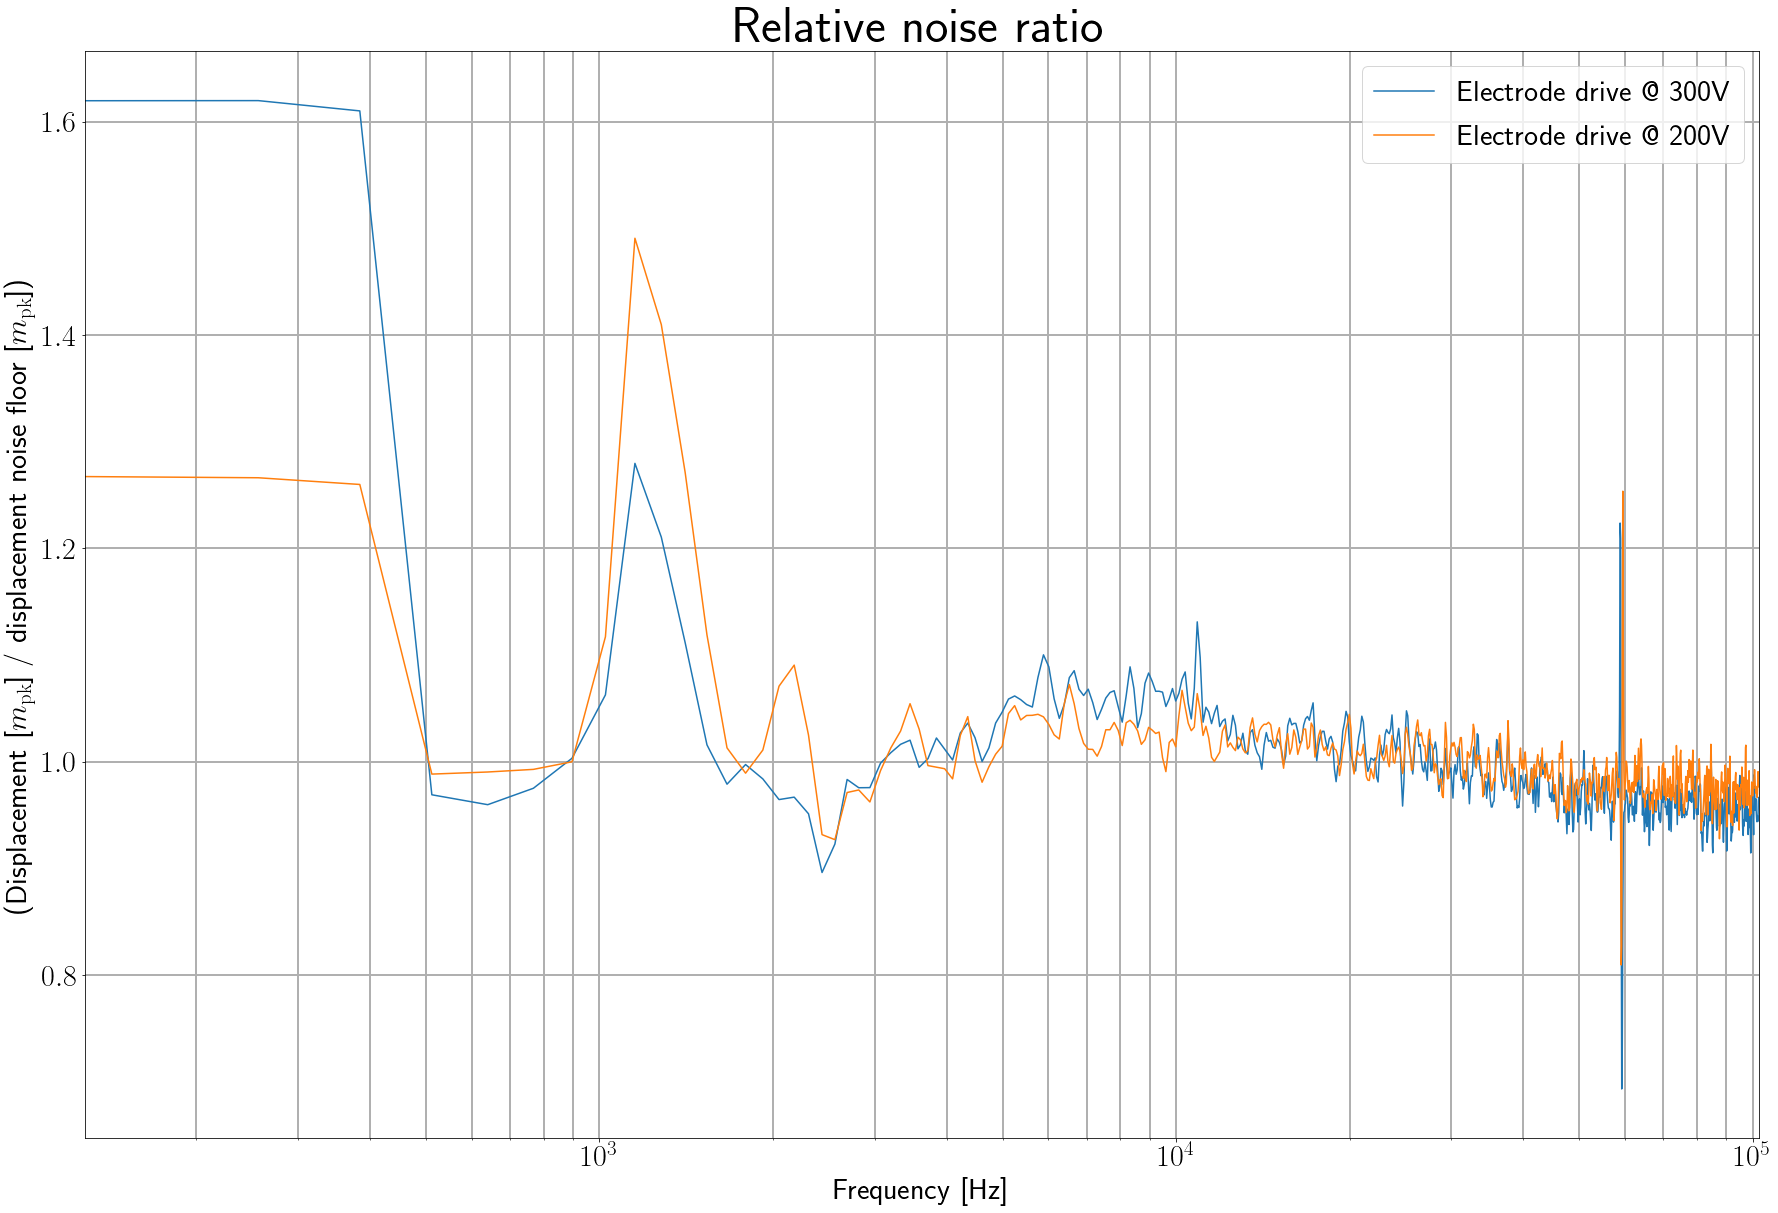

In [32]:
fig = plt.figure(figsize=(30,20))
plt.semilogx(fff, nHz6/nHz2, label = 'Electrode drive @ 300V')
plt.semilogx(fff, nHz4/nHz2, label = 'Electrode drive @ 200V')
plt.xlim([fff[0], fff[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('(Displacement [$m_\mathrm{pk}$] / displacement noise floor [$m_\mathrm{pk}$])',FontSize=30)
plt.title("Relative noise ratio", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
plt.savefig(folder + 'noise_ratio2.png',dpi=300,bbox_inches='tight')